In [1]:
pip install --trusted-host pypi.python.org --trusted-host pypi.org --trusted-host files.pythonhosted.org pytest-xdist

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()

#Removes the limit for number of displayed columns
pd.set_option('display.max_columns', None)

#Sets the limit for number of displayed rows
pd.set_option('display.max_rows', 200)

#To perfom kmeans clustering and compute silhoutte scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#For scaling data using z-score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

#To compute distances
from scipy.spatial.distance import cdist

#To visualize the elbow curve and silhoutte scores
#from yellowbrick.cluster import KElbowVisualizer, SilhoutteVisualizer


In [3]:
data = pd.read_csv('data_add_nik.csv')
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [4]:
data.shape

(3268, 8)

In [5]:
data.sample(n=10, random_state= 1)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
255,Women's adidas Originals POD-S3.1 Shoes,CG6188,13999,6999,50,Adidas ORIGINALS,3.3,8
1551,Men's adidas Originals Superstar Pure Shoes,FV3013,11999,11999,0,Adidas ORIGINALS,3.9,10
1352,Men's adidas Originals Superstar Shoes,FV2806,7999,7999,0,Adidas ORIGINALS,4.4,42
1060,Men's adidas Football Nemeziz 19.3 Indoor Shoes,F34411,5999,3599,40,Adidas SPORT PERFORMANCE,4.5,75
808,Men's adidas Sport Inspired Court 80s Shoes,EE9676,5999,3599,40,Adidas CORE / NEO,4.5,55
836,Men's adidas Running Stargon 1.0 Shoes,CM4935,4799,3839,20,Adidas CORE / NEO,3.5,21
2107,Men's adidas Originals Yung-96 Chasm Shoes,EE7238,7999,4799,40,Adidas ORIGINALS,3.0,62
3002,Nike SB Air Max Stefan Janoski 2,AQ7477-009,0,9995,0,Nike,2.6,11
2329,Men's adidas Originals Rivalry Low Shoes,FV4287,10999,10999,0,Adidas ORIGINALS,2.8,8
602,Men's adidas Sport Inspired Lite Racer RBN Shoes,F36642,5599,3919,30,Adidas CORE / NEO,3.0,56


In [6]:
df = data.copy()

In [7]:
df.columns = [c.replace(" ","_") for c in df.columns]

In [8]:
df.columns

Index(['Product_Name', 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3268 non-null   object 
 1   Product_ID     3268 non-null   object 
 2   Listing_Price  3268 non-null   int64  
 3   Sale_Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [10]:
df.drop('Product_ID', axis = 1, inplace=True)

In [11]:
df.duplicated().sum()

117

- Drop these duplicate columns

In [12]:
df = df[(~df.duplicated())].copy()

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3151.0,7045.960330,4652.089511,0.0,4599.0,5999.0,8999.0,29999.0
Sale_Price,3151.0,5983.166931,4173.708897,449.0,2999.0,4599.0,7799.0,36500.0
Discount,3151.0,27.860997,22.442753,0.0,0.0,40.0,50.0,60.0
Rating,3151.0,3.285687,1.371611,0.0,2.6,3.6,4.4,5.0
Reviews,3151.0,41.891146,31.283464,0.0,12.0,40.0,69.0,223.0


In [15]:
#Correct for 0 in listing price. Check for how many columns have 0 as this is a missing entry error
(df.Listing_Price==0).sum()

336

In [16]:
df[(df.Listing_Price==0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...
3254,Nike Mercurial Vapor 13 Club MG,0,4995,0,Nike,0.0,0
3257,Air Jordan 5 Retro,0,15995,0,Nike,3.3,3
3260,Nike Tiempo Legend 8 Academy TF,0,6495,0,Nike,0.0,0
3262,Nike React Metcon AMP,0,13995,0,Nike,3.0,1


In [17]:
df[(df.Listing_Price==0)].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,336.0,336.000000,336.0,336.000000,336.000000
mean,0.0,11203.050595,0.0,2.797619,8.261905
std,0.0,4623.825788,0.0,2.150445,19.708393
min,0.0,1595.000000,0.0,0.000000,0.000000
25%,0.0,7995.000000,0.0,0.000000,0.000000
50%,0.0,10995.000000,0.0,3.950000,1.000000
75%,0.0,13995.000000,0.0,4.700000,6.000000
max,0.0,36500.000000,0.0,5.000000,223.000000


- Because discount for the items with missing listing prize is zero, we assume the selling price is the same as the discount price and replace accordingly

In [18]:
df.loc[(df.Listing_Price == 0), ["Listing_Price"]] = df.loc[(df.Listing_Price == 0), ["Sale_Price"]].values

In [19]:
df[(df.Listing_Price==0)]

,Product_Name,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews


In [20]:
#Check for missing values in data set
df.isna().sum()

Product_Name     0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

## Exploratory Data Analysis

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

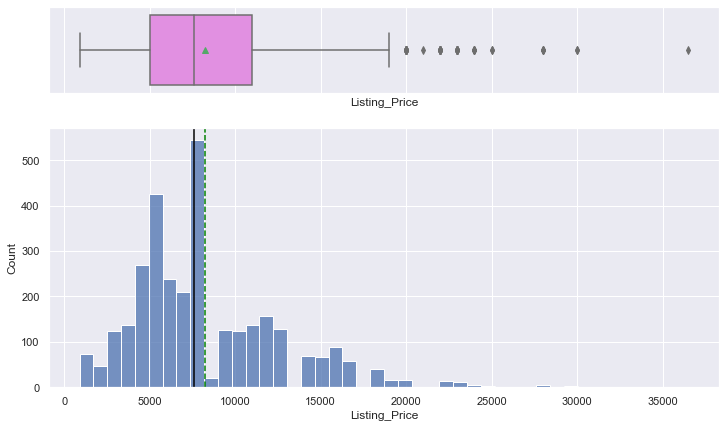

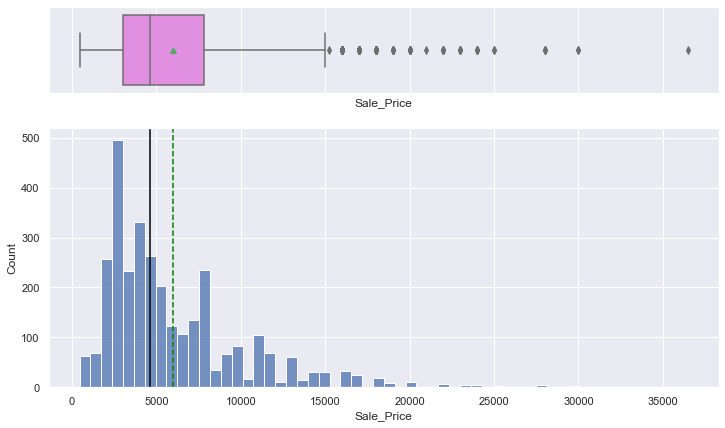

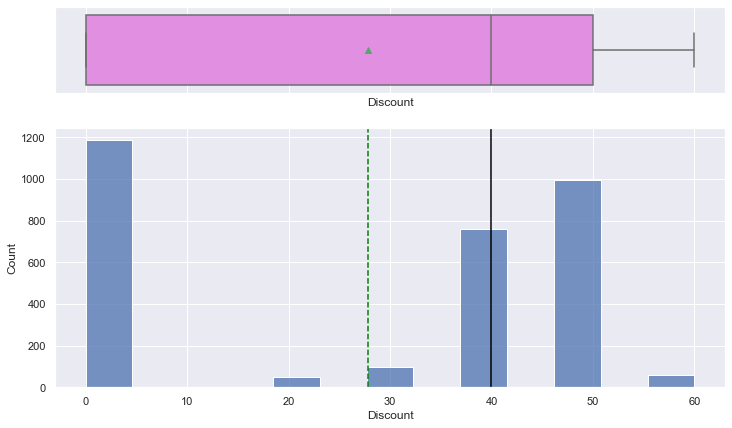

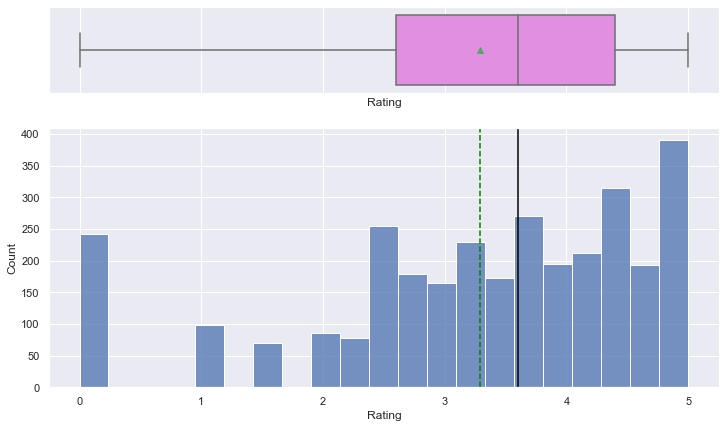

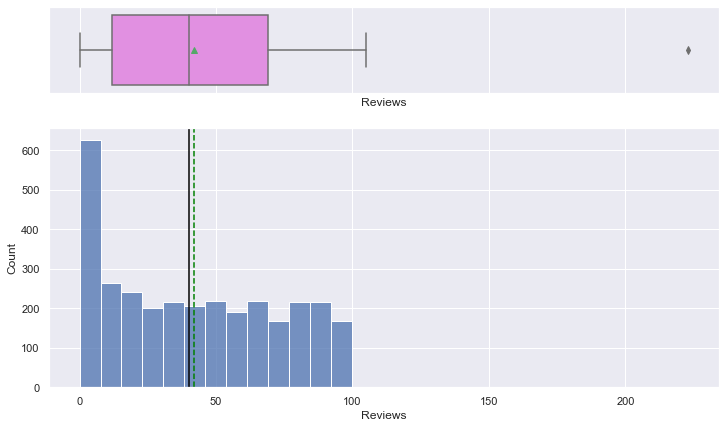

In [22]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

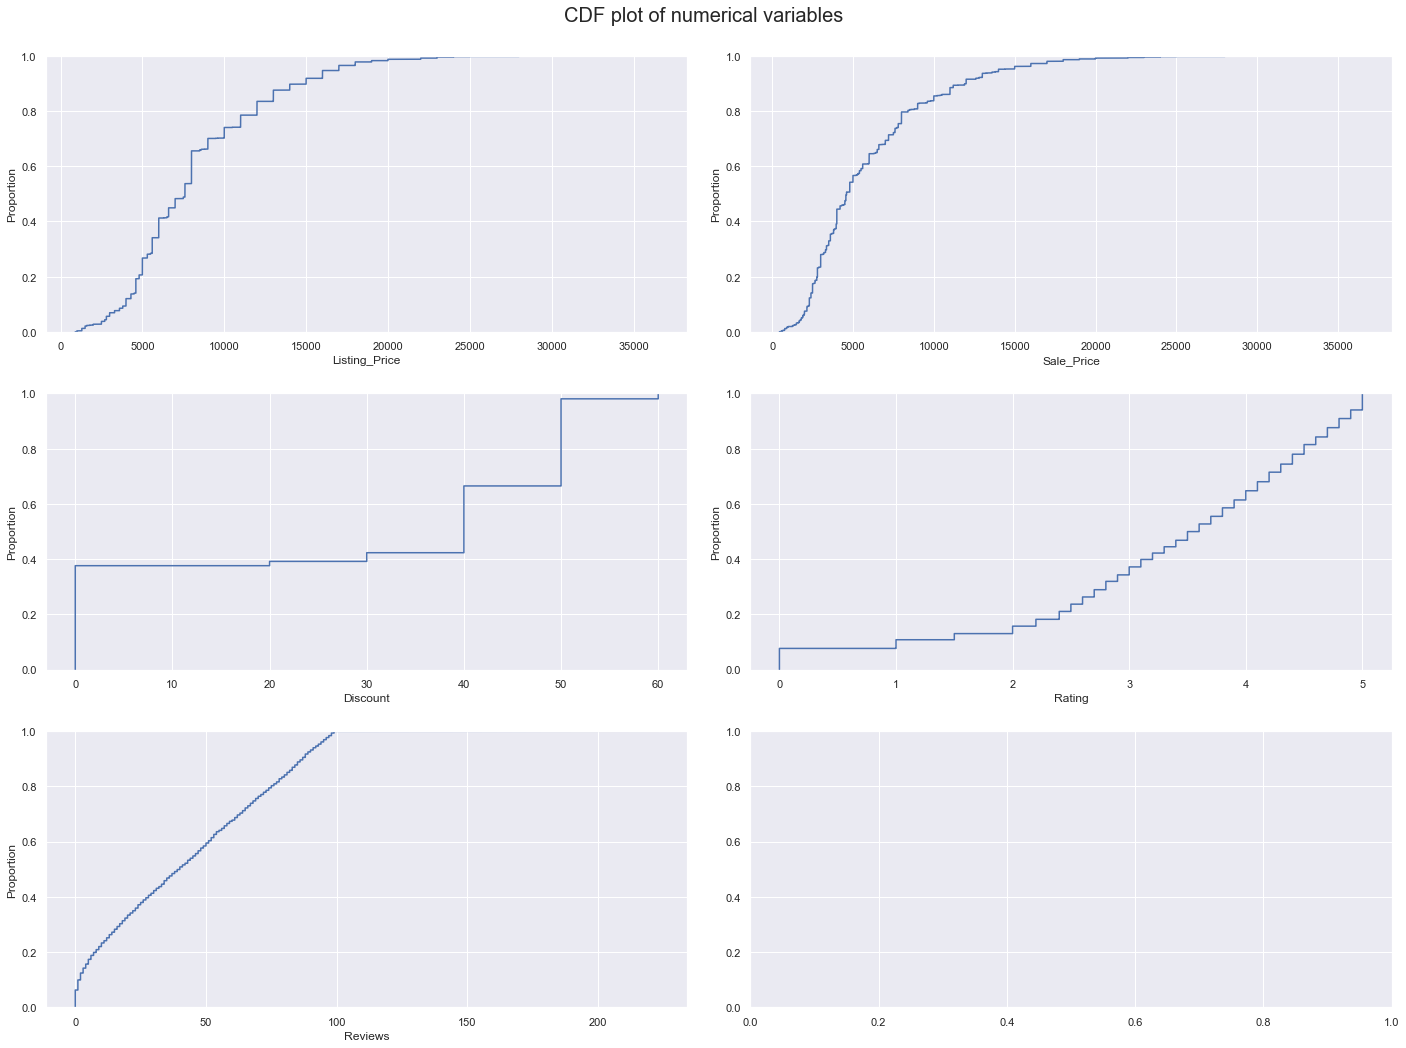

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

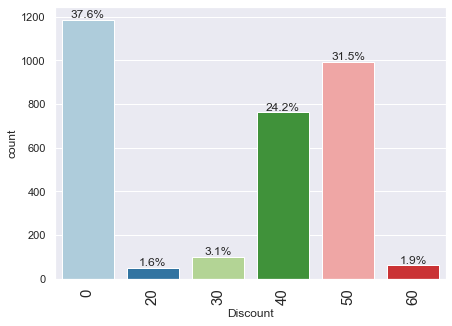

In [25]:
# let's explore discounts further
labeled_barplot(df, "Discount", perc=True)

## Bivariate Analysis

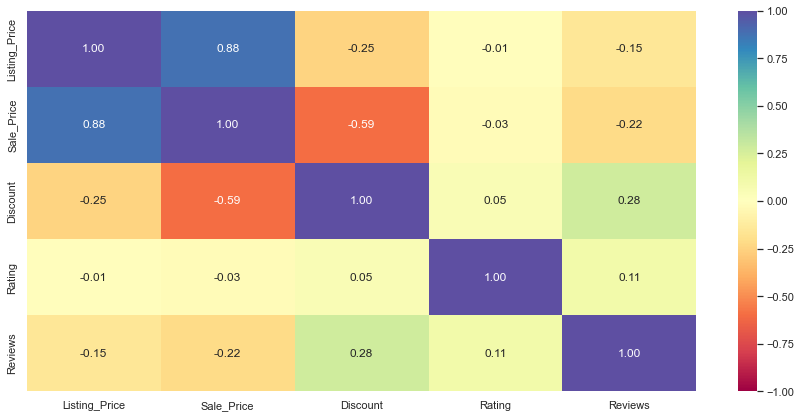

In [26]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

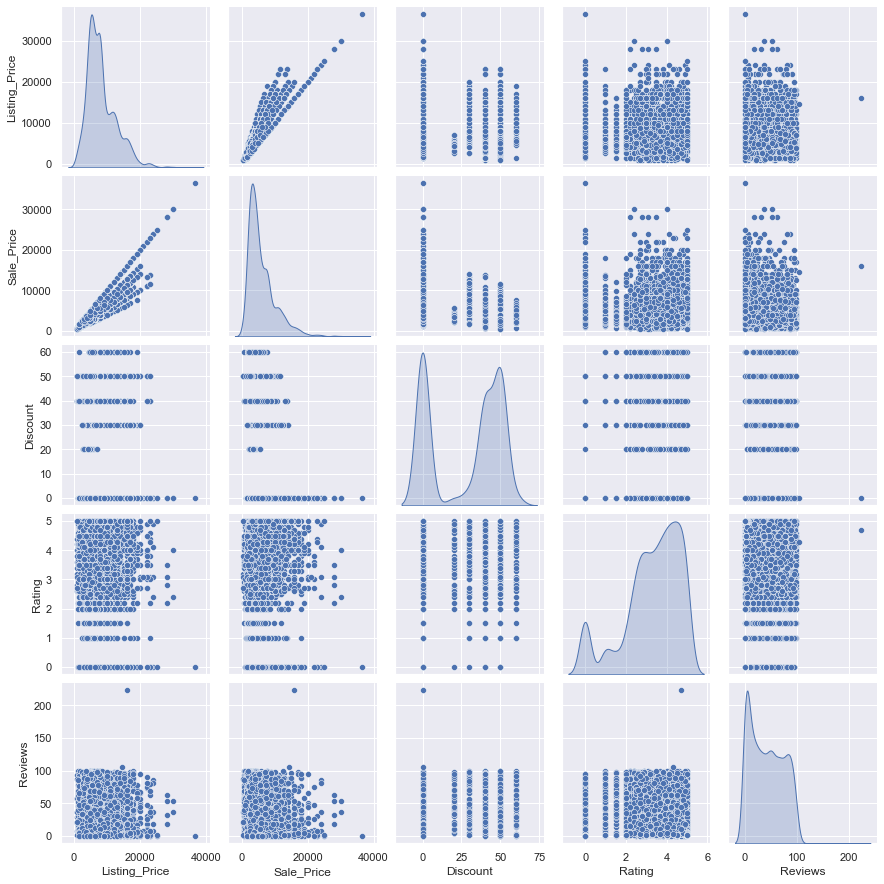

In [27]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

## Data Preprocessing

In [28]:
num_col

['Listing_Price', 'Sale_Price', 'Discount', 'Rating', 'Reviews']

### Scaling the data set before clustering

In [29]:
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

### Create a data frame of the scaled subset

In [30]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns= subset.columns)
subset_scaled_df.head()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
0,1.549271,0.363244,0.986622,1.104215,-0.028491
1,-0.147071,-0.523399,0.986622,0.010437,-0.571995
2,-1.660026,-1.290225,0.540973,-0.499993,-0.156374
3,-0.284613,-0.595289,0.986622,0.593785,-0.220316
4,-0.055377,-0.475472,0.986622,0.156274,0.962605


## K-Means Clustering

Number of CLusters: 1 	Average Distortion: 2.0907211006458244
Number of CLusters: 2 	Average Distortion: 1.712012896274925
Number of CLusters: 3 	Average Distortion: 1.5555310791060415
Number of CLusters: 4 	Average Distortion: 1.4455830503472198
Number of CLusters: 5 	Average Distortion: 1.3083252848926665
Number of CLusters: 6 	Average Distortion: 1.230315682610611
Number of CLusters: 7 	Average Distortion: 1.1635887498114736
Number of CLusters: 8 	Average Distortion: 1.100942643555167


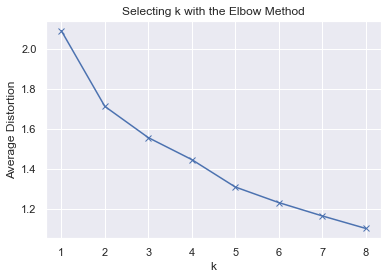

In [36]:
clusters = range(1,9)
meanDistortions=[]
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (sum(np.min(cdist(subset_scaled_df, model.cluster_centers_,"euclidean"), axis=1))/subset_scaled_df.shape[0])
    meanDistortions.append(distortion)
    
    print("Number of CLusters:",k,"\tAverage Distortion:", distortion)
    
plt.plot(clusters, meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

- K appears to be between 3 or 4

### Checking the silhoutte scores

For n_clusters = 2, the slilhoutte score us 0.33477783024101243
For n_clusters = 3, the slilhoutte score us 0.2972895256741108
For n_clusters = 4, the slilhoutte score us 0.3068390735837691
For n_clusters = 5, the slilhoutte score us 0.27041347372154434
For n_clusters = 6, the slilhoutte score us 0.2811661692670848
For n_clusters = 7, the slilhoutte score us 0.2912839983692141
For n_clusters = 8, the slilhoutte score us 0.2926979508723958
For n_clusters = 9, the slilhoutte score us 0.285965956274074


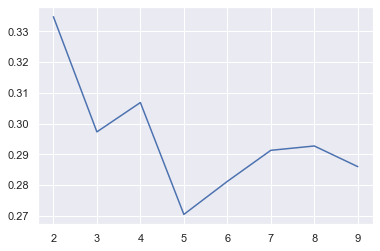

In [37]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters= n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print('For n_clusters = {}, the slilhoutte score us {}'.format(n_clusters,score))
    
plt.plot(cluster_list, sil_score)
plt.show()

- The silhoutte score for 4 is higher than that for 3, so we will choose 4 as the value of **k**

In [39]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

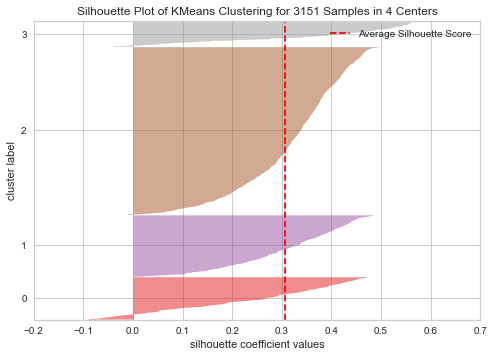

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3151 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state= 1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Using 4 a the number of clusters for kmeans

In [45]:
kmeans = KMeans(n_clusters =4, random_state= 0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

### Adding kmeans cluster labels to the original and scaled data frames

In [46]:
df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"]  = kmeans.labels_

## Cluster Profiling

In [53]:
cluster_profile = df.groupby('K_means_segments').mean() 

In [55]:
cluster_profile['count_in_each_segments'] = (df.groupby('K_means_segments')['Sale_Price'].count().values)

In [56]:
cluster_profile.style.highlight_max(color = "lightgreen", axis = 0)

,Listing_Price,Sale_Price,Discount,Rating,Reviews,count_in_each_segments
K_means_segments,,,,,,
0,15557.331111,13424.604444,8.711111,3.928444,31.780000,450
1,6804.826331,3688.977031,45.462185,3.390924,50.151261,1785
2,9725.996255,8331.101124,7.715356,0.255805,11.898876,267
3,6505.070878,6167.425270,1.016949,3.797072,38.522342,649


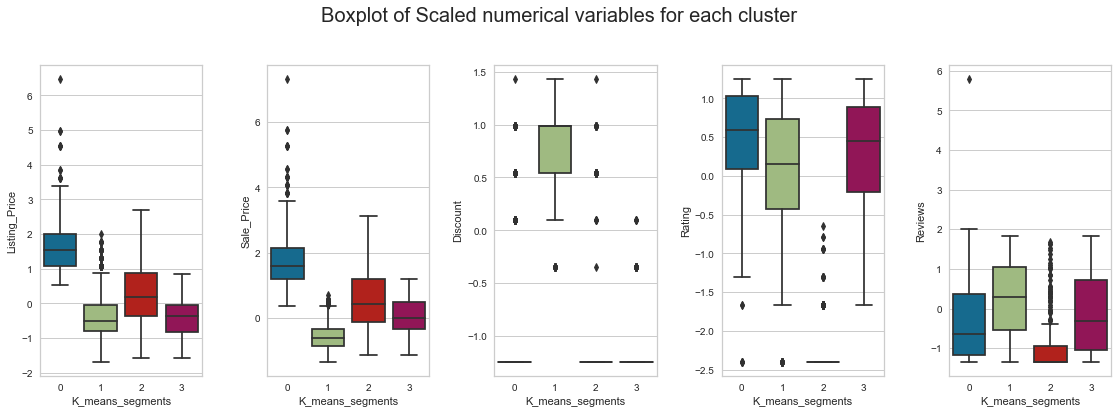

In [60]:
fig, axes = plt.subplots(1,5, figsize = (16,6))
fig.suptitle("Boxplot of Scaled numerical variables for each cluster", fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax = axes[ii],
        y = subset_scaled_df[num_col[counter]],
        x = subset_scaled_df['K_means_segments'],      
    )
    counter = counter + 1
    
fig.tight_layout(pad = 2.0)

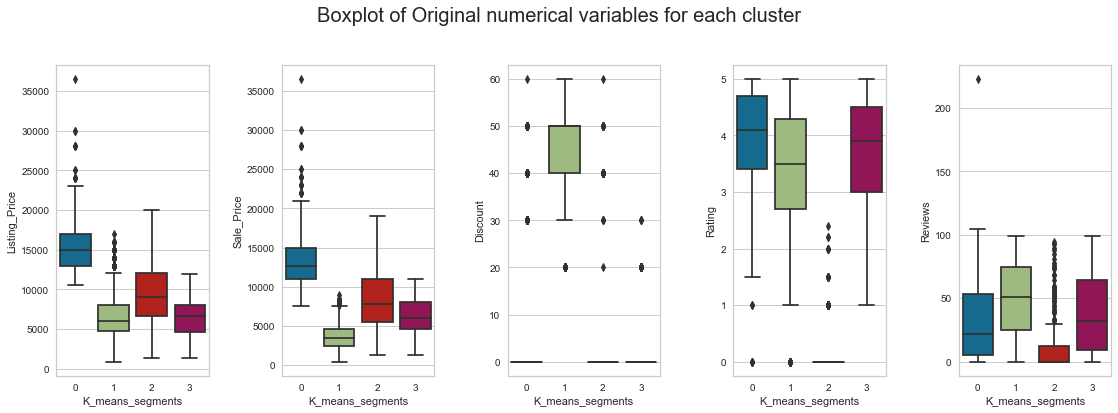

In [61]:
fig, axes = plt.subplots(1,5, figsize = (16,6))
fig.suptitle("Boxplot of Original numerical variables for each cluster", fontsize = 20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax = axes[ii],
        y = df[num_col[counter]],
        x = df['K_means_segments'],      
    )
    counter = counter + 1
    
fig.tight_layout(pad = 2.0)

### **Insights**

Cluster 0:

    -This cluster contains more expensive premium products, with an average listing price of approximately 15500.
    -Almost no discount is given to products in this cluster.
    -The median rating of this cluster is around 4 suggesting that customers are very satisfied with 50% of the products in this cluster.
    -Products in these clusters have got lesser reviews, which can be because these products are very expensive and fewer people buy them.

Cluster 1:

    - Listing price is low for products in this cluster, and the sale price is lower, as there are heavier discounts on these products.
    - 50% of the products have discounts between 30% to 40%.
    - More than 50% of products have a rating from 2.5 to 4.5 which indicates that customer satisfaction varies across products in this cluster.
    - On average, 50 reviews are given to products in this cluster.

Cluster 2:

    -The listing price of products in this cluster is similar to those in Cluster 1, but the sale price is comparatively higher as there are almost no discounts.
    -On average, 38 reviews are given to products in this cluster.

Cluster 3:

    -Listing and sale price of products in this cluster suggest that these are medium-range products.
    -Almost no discount is given to products in this cluster.
    -Products in this cluster have a low rating or no rating at all.

## Comparison Between Cluster and Brand

In [63]:
pd.crosstab(df.K_means_segments,df.Brand).style.highlight_max(color = 'lightgreen', axis = 0)

Brand,Adidas Adidas ORIGINALS,Adidas CORE / NEO,Adidas ORIGINALS,Adidas SPORT PERFORMANCE,Nike
K_means_segments,,,,,
0,0,0,133,128,189
1,1,864,564,356,0
2,0,18,53,23,173
3,0,229,156,99,165


- Adidas gives more discounts, Nike rarely gives any discounts.
- Nearly a third of Nike products are premium in nature.

## Business Recommendations

- Focussed marketing to target high power purchasing customers for cluster 0 products.
- Locate cluster 0 products in premium locations to target clients who look for premium products
- High dicsount products in cluster 1 can be sold in large quantities during festive activities to target mass markets.
- General marketing campaigns should be done for cluster 2 and 3 products to target the general public.